# GATE SIMULATION
###                              data preprocessing
                                                 made by Yangsuseong and Hongyonggi
                                                 
변수 선언 및 실행 함수는 아래 있음.

In [1]:
import os, glob, csv, codecs
import shutil
import re
import itertools
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
# 리스트 청크 함수 (리스트, 원하는 길이)
# 이거 하고나면 차원이 하나가 더 생겨서 언패킹함수를 사용하여 차원축소를 해야함
# dat_list.append(list(chunks(dat_list_pre, 3)))
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

In [3]:
# 차원 축소 함수
# dat_list = list(itertools.chain(*dat_list))
def chain(*iterables):
    # chain('ABC', 'DEF') --> ['A', 'B', 'C', 'D', 'E', 'F']
    for it in iterables:
        for element in it:
            yield element


#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-06"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-6) * 0.1)
                    #print("e-06 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-05"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-5)* 0.1)
                    #print("e-05 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-04"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-4)* 0.1)
                    #print("e-04 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-3)* 0.1)
                    #print("e-03 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-2)* 0.1)
                    #print("e-02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e-01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**-1)* 0.1)
                    #print("e-01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+00"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4])* 0.1)
                    #print("e+00 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+01"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10)* 0.1)
                    #print("e+01 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+02"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**2)* 0.1)
                    #print("e+02 complete")
                if(str(dat_list_xyz[i][j][k][-4:]) == "e+03"):
                    dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10**3)* 0.1)
                    #print("e+03 complete")
    #print("Complete") 
    #print("=================")
    return dat_list_xyz

In [4]:
#실제 데이터를 알맞는 form으로 바꾸는 함수
def make_form(dat_list_xyz, dat_len):
    for i in range(dat_len):
        for j in range(2):
            for k in range(3):
                for l in range(20):
                    if(l < 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                            #print(dat_list_xyz[i][j][k])
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-0"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                    elif(l >= 10):
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e+"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** int(l)) * 0.1)
                        if(str(dat_list_xyz[i][j][k][-4:]) == ("e-"+str(l))):
                            dat_list_xyz[i][j][k] = str(float(dat_list_xyz[i][j][k][:-4]) * (10 ** -int(l)) * 0.1)
                        
                
               
    return dat_list_xyz

In [5]:
# 각 크리스탈의 중심값을 얻어내기위한 함수 (3x3)
# find_xyz_center(디텍터 갯수, 크리스탈의 x축 갯수, 크리스탈의 y축 갯수, 크리스탈의 z축 갯수, 원점으로부터의 거리, 크리스탈의 x축 길이, 크리스탈의 y축 길이, 크리스탈의 z축 길이)
def YSS_find_xyz_center(detector_amount, crystal_x_amount, crystal_y_amount, crystal_z_amount, r, x_len, y_len, z_len):
    crystal_x_num = int((int(crystal_x_amount)/2))
    r = r-(x_len/2)
    
    
    result = []
    for i in range(int(detector_amount)):
        detector = []
        crystal = []
        crystal_z_num = int((int(crystal_z_amount)/2))
        for j in range(int(crystal_z_amount)):
            
            crystal_y_num = int((int(crystal_y_amount)/2))
            for k in range(int(crystal_y_amount)):
                crystal.append([r + (x_len/2), (y_len * crystal_y_num), (z_len * -crystal_z_num)])
                crystal_y_num = crystal_y_num - 1
            crystal_z_num = crystal_z_num - 1
        detector.append(crystal)
        result.append(detector)
    result = list(itertools.chain(*result))
    detector_rot = result
    result = []
    
    detector_num = 0
    for i in range(int(detector_amount)):
        det_rot = []
        for j in range(len(detector_rot[i])):
            det_rot.append([format((detector_rot[i][j][0]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)) - (detector_rot[i][j][1]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format((detector_rot[i][j][0]*math.sin(((360/detector_amount)*detector_num)*math.pi/180)) + (detector_rot[i][j][1]*math.cos(((360/detector_amount)*detector_num)*math.pi/180)),".3f"),\
                           format(detector_rot[i][j][2],".3f")])
        detector_num += 1
        result.append(det_rot)
    
            
    
    return result

In [6]:
# 각 디텍터의 중심값을 받아와 크리스탈의 모서리의 좌표를 구하는 함수
def find_crystal_edge(x, y, z, x_len, y_len, z_len):
    x = float(x)
    y = float(y)
    z = float(z)
    x_len = float(x_len)
    y_len = float(y_len)
    z_len = float(z_len)
    edge_a1 = [x-(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b1 = [x-(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c1 = [x-(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d1 = [x-(x_len/2), y-(y_len/2), z+(z_len/2)]
    edge_a2 = [x+(x_len/2), y+(y_len/2), z-(z_len/2)]
    edge_b2 = [x+(x_len/2), y+(y_len/2), z+(z_len/2)]
    edge_c2 = [x+(x_len/2), y-(y_len/2), z-(z_len/2)]
    edge_d2 = [x+(x_len/2), y-(y_len/2), z+(z_len/2)]
    
    
    crystal_edge = [edge_a1, edge_b1, edge_c1, edge_d1, edge_a2, edge_b2, edge_c2, edge_d2]
    #print(crystal_edge)
    return crystal_edge

In [7]:
def rotate_edge(crystal_edge, detector_num):
    rotate_crystal_edge_1 = []
    rad = math.pi/180 
    for i in range(detector_num):
        for j in range(len(crystal_edge)):
            for k in range(len(crystal_edge[j])):
                rotate_crystal_edge_1.append([(crystal_edge[j][k][0]*math.cos((((360/detector_num))*i)*rad)) - (crystal_edge[j][k][1]*math.sin((((360/detector_num))*i)*rad)),\
                                               (crystal_edge[j][k][0]*math.sin((((360/detector_num))*i)*rad)) + (crystal_edge[j][k][1]*math.cos((((360/detector_num))*i)*rad)),\
                                                crystal_edge[j][k][2]])
            
    return rotate_crystal_edge_1

In [8]:
def rotate_edge_yss(x, y, z, angle):
    rotate_crystal_edge_1 = []
    x = float(x)
    y = float(y)
    z = float(z)
    rad = math.pi/180 * angle
    rotate_crystal_edge_1.append([(x*math.cos(rad)) - (y*math.sin(rad)),\
                               (x*math.sin(rad)) + (y*math.cos(rad)),\
                                z])
    return rotate_crystal_edge_1


# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    global det_mat
    det_mat = []
    idx = 0
    
    
    
    # l = coincidence 갯수
    for l in tqdm.tqdm(range(len(dat_list))):
        
        detector_num = []
        sort_data_1 = []
        test=0
        # m = 2 (single 갯수)
        for m in range(len(dat_list[l])):
            # 여기까지 데이터 읽어오기
            
            for i in range(len(rotate_crystal_edge_chunks)):
                # 디텍터 헤드 갯수
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                z_max = -1000
                z_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    # 크리스탈 갯수
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        # 모서리 갯수
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) > z_max):
                            z_max = rotate_crystal_edge_chunks[i][j][k][2]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) < z_min):
                            z_min = rotate_crystal_edge_chunks[i][j][k][2]
                    else:

                        # 이 범위가 뭔가 이상하다
                        
                        
                        if(float(dat_list[l][m][0])>=x_min and float(dat_list[l][m][0])<x_max):
                            if(float(dat_list[l][m][1])>=y_min and float(dat_list[l][m][1])<y_max):    
                                if(float(dat_list[l][m][2])>=z_min and float(dat_list[l][m][2])<z_max):
                                    idx = i
                                    test += 1
                                    #print(idx)
                                    det_mat.append(idx)
                                    detector_num.append(i)
                                    sort_data_1.append(dat_list[l][m])

                                    #if(i!=test):
                                        #print(i)
                                    break
                                    
        print("test:",test)

        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
    # 여기서 엄청많이 버려진다 데이터가....
    # 2019.03.20 --> detector_num 의 갯수가 2개가 아니여서 이상하게 나오는거였다!!
        #if(len(detector_num)==2):
        sort_data.append(sort_data_1)
        detector_number.append(detector_num)

    print("idx:", idx)
    print("detector_number:",len(detector_number))
    return detector_number

In [9]:
# 데이터 범위를 디텍터 갯수에 맞게 미리 나누어내는 방법
# find_detector(원본 데이터, 모서리값, 디텍터 갯수)


def find_detector(dat_list, rotate_crystal_edge_chunks):
    detector_number = []
    global det_mat
    det_mat = []
    
    
    
    # l = coincidence 갯수
    for l in tqdm.tqdm(range(len(dat_list))):
        
        detector_num = []
        sort_data_1 = []
        test=0
        # m = 2 (single 갯수)
        for m in range(len(dat_list[l])):
            # 여기까지 데이터 읽어오기
            
            for i in range(len(rotate_crystal_edge_chunks)):
                # 디텍터 헤드 갯수
                
                x_max = -1000
                x_min = 1000
                y_max = -1000
                y_min = 1000
                z_max = -1000
                z_min = 1000
                for j in range(len(rotate_crystal_edge_chunks[i])):
                    # 크리스탈 갯수
                    for k in range(len(rotate_crystal_edge_chunks[i][j])):
                        # 모서리 갯수
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) > x_max):
                            x_max = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][0]) < x_min):
                            x_min = rotate_crystal_edge_chunks[i][j][k][0]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) > y_max):
                            y_max = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][1]) < y_min):
                            y_min = rotate_crystal_edge_chunks[i][j][k][1]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) > z_max):
                            z_max = rotate_crystal_edge_chunks[i][j][k][2]
                        if(float(rotate_crystal_edge_chunks[i][j][k][2]) < z_min):
                            z_min = rotate_crystal_edge_chunks[i][j][k][2]
                    else:
                        
                        if(l==0 and m==0):
                            print("=====",i,"=====")
                            print(x_min,"<=x<",x_max)
                            print(y_min,"<=y<",y_max)
                            print(z_min,"<=z<",z_max)
                            print("============")

                        # 이 범위가 뭔가 이상하다
                        
                        
                        if(float(dat_list[l][m][0])>=x_min and float(dat_list[l][m][0])<x_max and float(dat_list[l][m][1])>=y_min and float(dat_list[l][m][1])<y_max and float(dat_list[l][m][2])>=z_min and float(dat_list[l][m][2])<z_max):
                            
                            test += 1
                            detector_num.append(i)
                            sort_data_1.append(dat_list[l][m])

                            #if(i!=test):
                                #print(i)
                            break
                                    
    #    print("test:",test)

        
    # 버려지는 데이터들이 있어서 쌍이 있는 데이터들만 남기겠다.
    # 여기서 엄청많이 버려진다 데이터가....
    # 2019.03.20 --> detector_num 의 갯수가 2개가 아니여서 이상하게 나오는거였다!!
        #if(len(detector_num)==2):
        sort_data.append(sort_data_1)
        detector_number.append(detector_num)

    
    print("detector_number:",len(detector_number))
    return detector_number

In [10]:
# 정렬된 데이터와 디텍터 번호를 받아와 티텍터의 회전각만큼 회전변환을 통해 중심값으로 변경시키는 함수
# rotate_detector(정렬된 데이터, 디텍터 번호가 적힌 리스트, 디텍터 갯수)
def rotate_detector(sort_dat, detector_number_list, detector_num):
    a = 0
    b = 0
    c = 0
    global t_data
    global w_data
    t_data = []
    w_data = []
    
    final_dat = []
    angle = float(360/int(detector_num))
    print("angle:",angle)
    for idx,detector_n in enumerate(detector_number_list):
        #print(detector_n)
        #print(idx)
        # 먼저 x축과 평행한 디텍터로 옮기는 작업(회전변환)
        
        #data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],detector_num-(angle*float(detector_n)))
        data = rotate_edge_yss(sort_dat[idx][0],sort_dat[idx][1],sort_dat[idx][2],-(angle*detector_n))
        #print(data)
        #if(idx % 100 == 0):
            #print(idx)
            #print(data)
        #for j in range(len(sort_dat)):
            # 데이터를 읽은 후에 xyz범위를 찾아야지
        for i in range(len(origin_crystal_edge)):
            
            x_min = float(origin_crystal_edge[i][0][0])
            x_max = float(origin_crystal_edge[i][4][0])
            y_min = float(origin_crystal_edge[i][2][1])
            y_max = float(origin_crystal_edge[i][0][1])
            z_min = float(origin_crystal_edge[i][2][2])
            z_max = float(origin_crystal_edge[i][3][2])
            
            if(c == 0):
                print("=====",i,"=====")
                print(x_min,"<=x<",x_max)
                print(y_min,"<=y<",y_max)
                print(z_min,"<=z<",z_max)
                print("============")
            

            if(float(data[0][0])>=x_min and float(data[0][0])<x_max):
                if(float(data[0][1])>=y_min and float(data[0][1])<y_max):
                    if(float(data[0][2])>=z_min and float(data[0][2])<z_max):
                        after_data = rotate_edge_yss(crystal_location[0][i][0],crystal_location[0][i][1],crystal_location[0][i][2],angle*detector_n)
        
           
                        a = a+1
                        final_dat.append(after_data)
                        t_data.append([detector_n,data])
                    else:
                        b += 1
                        w_data.append([detector_n,data])
                else:
                    b += 1
                    w_data.append([detector_n,data])
            else:
                b += 1
                w_data.append([detector_n,data])
                
        c = c+1
    print("전체 데이터:",len(sort_dat))
    print("범위 내의 값:",a)                    
    print("범위 밖의 값:",b)
    print("=================")

    return final_dat
                

In [11]:
def start_preprocessing(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len):
    dat_list_all = []
    dat_list_pre = []
    dat_list = []
    dat_list_xyz_1 = []
    global sort_data
    global detector_num
    global origin_crystal_edge
    global crystal_location


    #print("--------------" + dat_file_list[i]) + "----------------")
    print(str(len(dat_file_list)) + "개의 파일을 변환합니다.")
    for i in range(len(dat_file_list)):
        idx = 0
        print(str(i+1) + "번째 파일")
        txt_data = open(dat_dir+dat_file_list[i],'r')
        for j in txt_data:
            j = " ".join(j.split())
            j = j.split(" ")
            dat_list_all.append(j)
            #print(dat_list_all)

    print("=================")
    
    dat_len = len(dat_list_all) - 1
    
    for i in range(len(dat_list_all) -1):
        #print(i)
        dat_list_pre.append(dat_list_all[i][8])
        dat_list_pre.append(dat_list_all[i][9])
        dat_list_pre.append(dat_list_all[i][10])
        dat_list_pre.append(dat_list_all[i][31])
        dat_list_pre.append(dat_list_all[i][32])
        dat_list_pre.append(dat_list_all[i][33])

    dat_list.append(list(chunks(dat_list_pre, 3)))
    dat_list = list(itertools.chain(*dat_list))
    dat_list_xyz_1.append(list(chunks(dat_list,2)))
    dat_list_xyz_1 = list(itertools.chain(*dat_list_xyz_1))

    print("좌표 가져오기 완료!")
    print("=================")
    txt_data.close()
    
    # 실제 데이터를 form에 맞게 수정
    global dat_list_xyz
    dat_list_xyz = make_form(dat_list_xyz_1, dat_len)
    
    #print(dat_list_xyz)
    
    # 각 크리스탈의 중심값 찾기 (detector_num, crystal_x_amount, crystal_y_amount, crystal_z_amount, r길이(원점으로부터 헤드까지 거리), 크리스탈의 x_len(cm), y_len(cm), z_len(cm))

    crystal_location = YSS_find_xyz_center(detector_head_num, crystal_x_num, crystal_y_num, crystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)
    print("0번 디텍터 크리스탈 중심값:",crystal_location[0])
    print("중간지점 디텍터 인덱스:",int(detector_head_num)/2)
    print("중간지점 디텍터 중심값:", crystal_location[int(detector_head_num/2)])
    # 각 크리스탈의 모서리 값 구하기
    origin_crystal_edge = []
    for j in range(len(crystal_location[0])):
        # find_crystal_edge(크리스탈 중점 x좌표, 크리스탈 중점 y좌표, 크리스탈 중점 z좌표, 크리스탈의 x_len, y_len z_len)
        origin_crystal_edge.append(find_crystal_edge(crystal_location[0][j][0],\
                              crystal_location[0][j][1],\
                              crystal_location[0][j][2],\
                              crystal_x_len, crystal_y_len, crystal_z_len))  
    
    # 모서리 회전변환
    # rotate_edge(0번 디텍터 크리스탈 엣지, 디텍터 헤드 갯수)
    rotate_crystal_edge = rotate_edge(origin_crystal_edge, detector_head_num)

    # 모서리 좌표 리스트를 차원을 늘려서 디텍터별로 나누자
    rotate_crystal_edge_chunks_1 = []
    global rotate_crystal_edge_chunks
    rotate_crystal_edge_chunks = []
    rotate_crystal_edge_chunks_1.append(list(chunks(rotate_crystal_edge, 8)))
    rotate_crystal_edge_chunks_1 = list(itertools.chain(*rotate_crystal_edge_chunks_1))
    rotate_crystal_edge_chunks.append(list(chunks(rotate_crystal_edge_chunks_1, crystal_x_num*crystal_y_num*crystal_z_num)))
    rotate_crystal_edge_chunks = list(itertools.chain(*rotate_crystal_edge_chunks))
    
    # 함수 실행
    global sort_data
    sort_data = []
    global detector_number
    global detector_num
    # find_detector(원본 데이터, 각 크리스탈의 모서리값)
    detector_number = find_detector(dat_list_xyz, rotate_crystal_edge_chunks)
    #detector_number = list(itertools.chain(*detector_number))
    #sort_data = list(itertools.chain(*sort_data)
    
    # 차원 축소 작업
    detector_num = detector_number
    detector_num = list(itertools.chain(*detector_num))
    sort_dat = sort_data
    sort_dat = list(itertools.chain(*sort_dat))
    #sort_dat = list(itertools.chain(*sort_dat))
    
    # ============================================
    print("sort_dat_len:",len(sort_dat))
    print("detector_num_len:",len(detector_num))
    # ============================================
    
    # 함수 돌리기
    # rotate_detector(차원이 변경된 원본데이터, 각 coincidence가 감지된 디텍터 헤드 번호, 디텍터 헤드 갯수)
    final_output = rotate_detector(sort_dat, detector_num, detector_head_num)
    #print(final_output)
    # 차원 축소 작업
    final_data = final_output

    final_data = list(itertools.chain(*final_data))

    final_dat = []
    for i in range(len(final_data)):
        final_dat.append([float(final_data[i][0]), float(final_data[i][1]), float(final_data[i][2])])

    final_data_1=[]
    final_data_1.append(list(chunks(final_dat, 2)))
    final_data_1 = list(itertools.chain(*final_data_1))
    
    print("preprocessing complete!")
    
    return final_data_1

## R Phi Theta를 구하는 함수 


In [25]:
def cal_angle (det1,det2):
    
    det_x1 = det1[0]
    det_y1 = det1[1]
    det_z1 = det1[2]
    det_x2 = det2[0]
    det_y2 = det2[1]
    det_z2 = det2[2]
    det_x1 = float(det_x1)
    det_y1 = float(det_y1)
    det_z1 = float(det_z1)
    det_x2 = float(det_x2)
    det_y2 = float(det_y2)
    det_z2 = float(det_z2)
    a = det_x1 - det_x2
    b = det_y1 - det_y2
    c = det_x2 - det_x1
    d = det_y2 - det_y1
    distance = float(zero_to_head_len + crystal_x_len/2 ) *2  #  float(zero_to_head_len + crystal_x_len/2 )  디텍터 반지름
    theta = math.atan( ( det_z1 - det_z2 )/ distance)
    
    if b == 0 :
        phi = 90*math.pi/180
        radius = det_y1
        

        
    else:
        phi = math.atan(- a / b)
        
        if a == 0:
            phi = 0
            radius = det_x1
        else:
            radius = -(b / a) * det_x1 * math.sin(phi) + det_y1 * math.sin(phi)
    
    result = [radius, phi, theta]
    return  result

## def Phi_ angle : angle_flag가 True 이면 degree로 sinogram 

## final_data_1 데이터를 받아 R, Theta, Phi 로 바꾼 Numpy리스트 : numpyrecord를 만듬

## Theta 구하는 공식 적용해서 indirect plane과 direct plane 합치기

In [38]:
def drawSinogram (size_x = 91, size_y = 180):
    final_data_2=np.array(final_data_1)
    record = []
    record1 = []
    for i in range(0,len(final_data_1)-1):
        record.append(cal_angle(final_data_2[i][0],final_data_2[i][1]))
    numpyrecord = np.array(record)
    #앞에서 정의하였던 cal_angle 함수를 이용하여 record 함수를 만든다.
    
    Theta = math.atan(crystal_z_len/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    # Theta 범위를 지정해주기 위한 값 
    # indirect plane 값
    
    for i in range (0,len(numpyrecord)):
        if (numpyrecord[:][i][2]>= -Theta) or (numpyrecord[:][i][2]<= Theta):
            record1.append(numpyrecord[:][i][:])
    # Theta 범위 안에 있는 값들만 뽑아서 record1에 더해주었다.
    
    
    Phi = [] # R Phi Theta 값 중에서 Phi 값 만을 뽑기 위해 만든 리스트
    Phi_degree = []
    Phi_degree1 = []
    Phi_degree2 = []
    R = []  #R Phi Theta 값 중에서 R 값 만을 뽑기 위해 만든 리스트
    
    for i in range(0,len(record1)):
        Phi.append(record1[:][i][1])
        
    for i in range(0,len(record1)):
        R.append(record1[:][i][0])
    R1 = np.array(R) 
    R2 = (R1+float(zero_to_head_len +crystal_x_len/2)) # 음수 값을 없애주기 위해서 반지름을 더함
    R3 = np.array(R2)   
    
  

    
   
    for j in range (0,len(record1)):
        Phi_degree.append(math.degrees(Phi[j]))
    Phi_degrees = np.array(Phi_degree)
    
    R3[Phi_degrees < 0] = R3[Phi_degrees < 0] *(-1)
    Phi_degrees[Phi_degrees < 0 ] = Phi_degrees[Phi_degrees < 0 ] + 180 # 음수인 각도들을 180도를 더해줘서 바꿔준다.
    
    
    for i in range(0,len(Phi_degrees)):
        Phi_degree1.append(Phi_degrees[i])
    Phi_degree2 = np.array(Phi_degree1)
    Phi_degree3 = Phi_degree2 
    
    trans_degree = (size_y *Phi_degree3/180)
    trans_radius = (size_x *R3/( float(zero_to_head_len + crystal_x_len/2 ) *2))
    
    trans_radius[trans_degree>(size_y-1)] = trans_radius[trans_degree>(size_y-1)] * (-1)
    trans_degree[trans_degree>(size_y-1)] =trans_degree[trans_degree>(size_y-1)] - size_y
        
    
    image = np.zeros((size_x,size_y),dtype =np.float64) 
        # Sinogram 이미지를 만들기위해서 빈 이미지를 만들어준다.
        
    for i in range(0, len(trans_degree)):
            image[int(trans_radius[i])][int(trans_degree[i])] = image[int(trans_radius[i])][int(trans_degree[i])] + 1
        # image를 Phi_degree1의 값과 R2의 값에 따라 픽셀의 값을 올려준다, 
        
    image1 = image.T 
    print(image1.max())
   
    print("image 모양")
    print(image1.shape)
    print("coincidence 개수")
    print(trans_degree.shape)
    print(trans_radius.shape)
    print("trans_degree 최대 최소값")
    print(trans_degree.max())
    print(trans_degree.min())
    print("trans_radius 최대 최소값")
    print(trans_radius.max())
    print(trans_radius.min())
    
    return image1   

634.0
image 모양
(32, 40)
coincidence 개수
(27897,)
(27897,)
trans_degree 최대 최소값
31.0
-0.5000000000000036
trans_radius 최대 최소값
36.470588235294116
-36.45074869043814


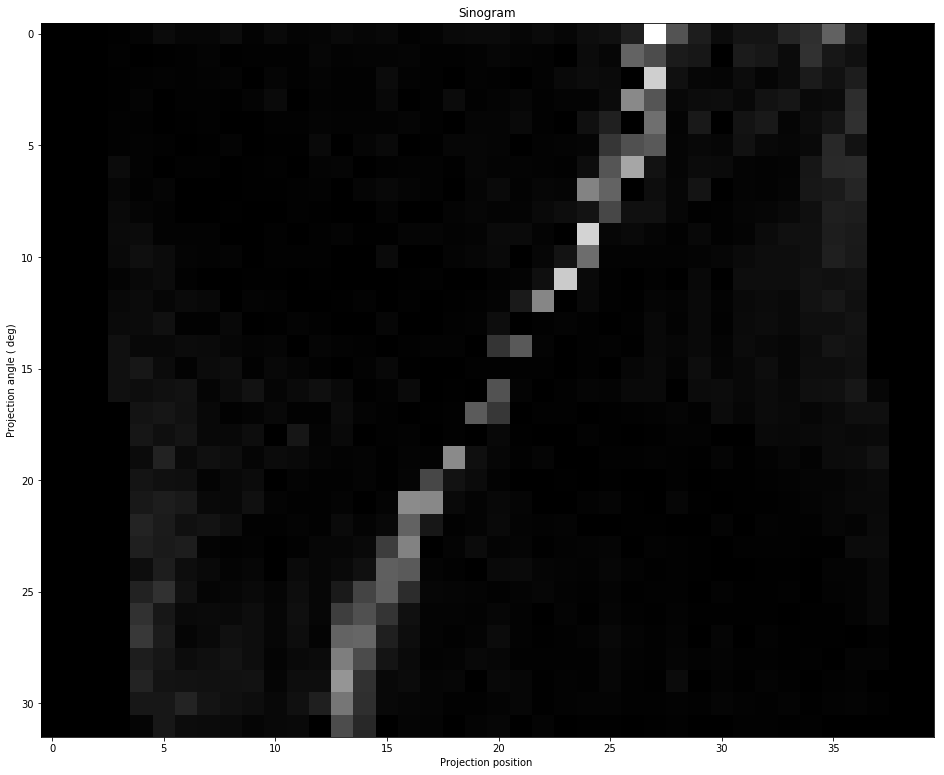

In [39]:
image1 = drawSinogram(40,32)
#fig, (ax1) = plt.subplots(1, 1)
fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position ")
ax1.set_ylabel("Projection angle ( deg)")
plt.imshow(image1, cmap=plt.cm.Greys_r)


---

---

---

---

---

# 실행 부분
## 변수 값만 변경할것
## 데이터 경로 설정에서 각 파일 명에 대한 슬라이싱 범위 체크할것

In [14]:
import glob
# 데이터 경로 설정
dat_dir = "./data/"
dat_file_list = glob.glob(dat_dir + '/*.dat')
dat_file_list.sort()
print(dat_file_list)
print(dat_file_list[9][-34:])

# 파일명 슬라이싱
dat_file_list = [dat_file_list[9][-34:]]

['./data\\gate_data_0000_2019.03.18_0001.dat', './data\\gate_data_0000_2019.03.18_0002.dat', './data\\gate_data_0001_2019.03.18_0001.dat', './data\\gate_data_0001_2019.03.18_0002.dat', './data\\gate_data_2019.03.11_0001.dat', './data\\gate_data_2019.03.11_0002.dat', './data\\gate_data_2019.03.11_0003.dat', './data\\gate_data_2019.03.11_0004.dat', './data\\gate_data_test_2019.03.20_0001.dat', './data\\gate_data_test_2019.03.20_0002.dat']
gate_data_test_2019.03.20_0002.dat


In [15]:
# 변수 정의

#디텍터 헤드 갯수
detector_head_num =  64

# 크리스탈 각 축의 갯수
ctystal_x_num = 1
ctystal_y_num = 1
ctystal_z_num = 1

# 단위 = cm
zero_to_head_len = 7
crystal_x_len = 3
crystal_y_len = 0.2
crystal_z_len = 1.8



In [16]:
final_data_1 =start_preprocessing(detector_head_num, ctystal_x_num, ctystal_y_num, ctystal_z_num, zero_to_head_len, crystal_x_len, crystal_y_len, crystal_z_len)


        
    

1개의 파일을 변환합니다.
1번째 파일
좌표 가져오기 완료!
0번 디텍터 크리스탈 중심값: [['7.000', '0.000', '0.000']]
중간지점 디텍터 인덱스: 32.0
중간지점 디텍터 중심값: [['-7.000', '0.000', '0.000']]


  0%|                                                                                        | 0/27918 [00:00<?, ?it/s]

===== 0 =====
5.5 <=x< 8.5
-0.1 <=y< 0.1
-0.9 <=z< 0.9
===== 1 =====
5.463714282664127 <=x< 8.46887189074663
0.4395757991453636 <=y< 0.9326641654684849
-0.9 <=z< 0.9
===== 2 =====
5.374810010016154 <=x< 8.356183915629073
0.9749182430483824 <=y< 1.7563462651774133
-0.9 <=z< 0.9
===== 3 =====
5.234143378801702 <=x< 8.163021321449222
1.500871691326322 <=y< 2.5631137902361507
-0.9 <=z< 0.9
===== 4 =====
5.043069085575568 <=x< 7.891244369582446
2.012370924756865 <=y< 3.3451971283543918
-0.9 <=z< 0.9
===== 5 =====
4.803427280233353 <=x< 7.543470420643618
2.504489926108152 <=y< 4.095064389455815
-0.9 <=z< 0.9
===== 6 =====
4.517525844362039 <=x< 7.123048727873595
2.9724893203775573 <=y< 4.805493941896873
-0.9 <=z< 0.9
===== 7 =====
4.18811816507869 <=x< 6.6340281819996285
3.4118620175637764 <=y< 5.46964396072726
-0.9 <=z< 0.9
===== 8 =====
3.818376618407357 <=x< 6.081118318204309
3.818376618407357 <=y< 6.081118318204309
-0.9 <=z< 0.9
===== 9 =====
3.4118620175637764 <=x< 5.46964396072726
4.18

100%|███████████████████████████████████████████████████████████████████████████| 27918/27918 [01:34<00:00, 294.80it/s]


detector_number: 27918
sort_dat_len: 104396
detector_num_len: 104396
angle: 5.625
===== 0 =====
5.5 <=x< 8.5
-0.1 <=y< 0.1
-0.9 <=z< 0.9
전체 데이터: 104396
범위 내의 값: 55795
범위 밖의 값: 48601
preprocessing complete!


# detector_number 를 구하는 과정에서 오류가 발생하는것으로 예상됨.
# sort_dat 과 detector_num 의 매칭이 잘 이루어 지지 않음

In [17]:
len(detector_number)

27918

In [18]:
len(sort_data)

27918

#  #1 세팅에서 매칭이 잘 되고있는지 확인해보자

In [19]:
test_1 = []
for i in range(len(sort_data)):
    for j in range(len(sort_data[i])):
        test_1.append([detector_number[i][j], sort_data[i][j]])

In [20]:
test_1[2][1]

['3.8420000000000005', '-4.627', '-0.0020410000000000003']

In [21]:
a = 0
b = 0
for i in range(len(test_1)):
    test_data = rotate_edge_yss(test_1[i][1][0], test_1[i][1][1], test_1[i][1][2],-(2.8125*test_1[i][0]))
    
    if(float(test_data[0][0])>=5.5 and float(test_data[0][0])<8.5):
        if(float(test_data[0][1])>=-0.1 and float(test_data[0][1])<0.1):
            if(float(test_data[0][2])>=-0.9 and float(test_data[0][2])<0.9):
                
                a += 1
            else:
                print("=======================")
                print("original:",test_1[i])
                print("after:",test_data)
                print("=======================")
                b += 1
        else:
            print("=======================")
            print("original:",test_1[i])
            print("after:",test_data)
            print("=======================")
            b+=1
    else:
        print("=======================")
        print("original:",test_1[i])
        print("after:",test_data)
        print("=======================")
        b+=1
        
print("범위 내의 값:",a)
print("범위 밖의 값:",b)
        
        

original: [13, ['1.596', '8.111000000000002', '-3.024000000000004e-20']]
after: [[6.113636278981238, 5.564080197869589, -3.024000000000004e-20]]
original: [14, ['1.596', '8.111000000000002', '-3.024000000000004e-20']]
after: [[6.379288611418258, 5.257396105699983, -3.024000000000004e-20]]
original: [54, ['3.8420000000000005', '-4.627', '-0.0020410000000000003']]
after: [[-5.569494198920272, 2.269543427254354, -0.0020410000000000003]]
original: [55, ['3.8420000000000005', '-4.627', '-0.0020410000000000003']]
after: [[-5.4514242814821845, 2.5400917903230282, -0.0020410000000000003]]
original: [56, ['3.8420000000000005', '-4.627', '-0.0020410000000000003']]
after: [[-5.320221405461635, 2.8045208497830485, -0.0020410000000000003]]
original: [30, ['-5.713000000000001', '1.215', '-3.231000000000003e-20']]
after: [[0.6491775202039398, 5.804581168978679, -3.231000000000003e-20]]
original: [63, ['7.993000000000001', '-0.7229000000000001', '0.12090000000000001']]
after: [[-8.018843103219234, 0.3

after: [[7.06503846795172, 1.7544162694076944, 0.00873]]
original: [8, ['6.061', '4.032', '0.00873']]
after: [[7.142613445846951, 1.405637991520699, 0.00873]]
original: [56, ['5.861000000000001', '-3.849', '-1.762000000000001e-20']]
after: [[-6.887806471221883, 1.3131047235441504, -1.762000000000001e-20]]
original: [57, ['5.861000000000001', '-3.849', '-1.762000000000001e-20']]
after: [[-6.81507881174434, 1.6494916761576461, -1.762000000000001e-20]]
original: [58, ['5.861000000000001', '-3.849', '-1.762000000000001e-20']]
after: [[-6.7259330304789025, 1.9819048588448678, -1.762000000000001e-20]]
original: [59, ['5.861000000000001', '-3.849', '-1.762000000000001e-20']]
after: [[-6.620583887420886, 2.3095434591327693, -1.762000000000001e-20]]
original: [19, ['-2.147', '6.924000000000001', '3.169000000000002e-20']]
after: [[4.282442541226732, 5.849108554394554, 3.169000000000002e-20]]
original: [20, ['-2.147', '6.924000000000001', '3.169000000000002e-20']]
after: [[4.564286305289738, 5.63

after: [[6.128811369520517, 3.3690598387140653, 0.01915]]
original: [9, ['4.373', '5.458', '0.01915']]
after: [[6.2867408787712975, 3.0642751382971305, 0.01915]]
original: [10, ['4.373', '5.458', '0.01915']]
after: [[6.429525078591652, 2.752108330673235, 0.01915]]
original: [50, ['1.276', '-6.258', '2.3840000000000007e-20']]
after: [[-4.956394510786946, 4.028013586551197, 2.3840000000000007e-20]]
original: [48, ['0.03787000000000001', '-5.583', '-0.013150000000000002']]
after: [[-3.97455529316803, 3.92099902556096, -0.013150000000000002]]
original: [6, ['5.349', '4.459', '1.8510000000000017e-20']]
after: [[6.413053231709233, 2.7142642183958, 1.8510000000000017e-20]]
original: [7, ['5.349', '4.459', '1.8510000000000017e-20']]
after: [[6.5385110609398875, 2.396321160856104, 1.8510000000000017e-20]]
original: [8, ['5.349', '4.459', '1.8510000000000017e-20']]
after: [[6.648217044318808, 2.072605155746962, 1.8510000000000017e-20]]
original: [9, ['5.349', '4.459', '1.8510000000000017e-20']]


original: [8, ['4.358', '5.403', '2.0460000000000004e-20']]
after: [[6.093905587752767, 3.3239867159114205, 2.0460000000000004e-20]]
original: [9, ['4.358', '5.403', '2.0460000000000004e-20']]
after: [[6.249665509235779, 3.0209690535767946, 2.0460000000000004e-20]]
original: [10, ['4.358', '5.403', '2.0460000000000004e-20']]
after: [[6.390369439100995, 2.7106736121864645, 2.0460000000000004e-20]]
original: [4, ['6.58', '2.802', '-0.027200000000000002']]
after: [[7.000210227342447, 1.464466036823728, -0.027200000000000002]]
original: [5, ['6.58', '2.802', '-0.027200000000000002']]
after: [[7.063636110109044, 1.119217987687636, -0.027200000000000002]]
original: [42, ['-3.315', '-4.988', '2.956000000000002e-20']]
after: [[-2.836343083991413, 5.274895914602874, 2.956000000000002e-20]]
original: [43, ['-3.315', '-4.988', '2.956000000000002e-20']]
after: [[-2.574099709680828, 5.407714830186691, 2.956000000000002e-20]]
original: [60, ['5.219000000000001', '-2.171', '-0.0007155000000000001']]


original: [8, ['5.403', '4.463', '1.8620000000000032e-20']]
after: [[6.699637272803877, 2.055635768529293, 1.8620000000000032e-20]]
original: [9, ['5.403', '4.463', '1.8620000000000032e-20']]
after: [[6.7924325327253126, 1.7244240454061135, 1.8620000000000032e-20]]
original: [37, ['-6.809000000000001', '-3.6170000000000004', '-3.8400000000000005e-20']]
after: [[-1.854150997843342, 7.483802113711757, -3.8400000000000005e-20]]
original: [38, ['-6.809000000000001', '-3.6170000000000004', '-3.8400000000000005e-20']]
after: [[-1.484704826917765, 7.565766423630002, -3.8400000000000005e-20]]
original: [2, ['6.268000000000001', '1.205', '1.2790000000000006e-20']]
after: [[6.355928520878451, 0.5848261600543114, 1.2790000000000006e-20]]
original: [49, ['0.8353999999999999', '-7.555', '-2.8870000000000035e-20']]
after: [[-5.692618473990757, 5.036865401177515, -2.8870000000000035e-20]]
original: [8, ['4.609000000000001', '5.617000000000001', '2.1460000000000028e-20']]
after: [[6.407693604939231, 3

original: [16, ['0.03381', '5.849', '-2.4089999999999997e-20']]
after: [[4.159774843432034, 4.1119602828882, -2.4089999999999997e-20]]
original: [56, ['5.981000000000001', '-5.879', '2.4210000000000026e-20']]
after: [[-7.77551938282437, 3.1426581626582513, 2.4210000000000026e-20]]
original: [56, ['6.013', '-3.9840000000000004', '-1.8350000000000022e-20']]
after: [[-7.079898423532885, 1.3796605787136813, -1.8350000000000022e-20]]
original: [57, ['6.013', '-3.9840000000000004', '-1.8350000000000022e-20']]
after: [[-7.003673639860108, 1.7253928672417373, -1.8350000000000022e-20]]
original: [58, ['6.013', '-3.9840000000000004', '-1.8350000000000022e-20']]
after: [[-6.91057639293955, 2.066968533226038, -1.8350000000000022e-20]]
original: [59, ['6.013', '-3.9840000000000004', '-1.8350000000000022e-20']]
after: [[-6.8008309621933964, 2.4035646909687367, -1.8350000000000022e-20]]
original: [19, ['-2.084', '6.827', '-0.06823000000000001']]
after: [[4.242060466856132, 5.740723647375507, -0.06823

original: [5, ['7.429000000000001', '3.8670000000000004', '0.005697000000000001']]
after: [[8.14596653566819, 1.9460110996019546, 0.005697000000000001]]
original: [26, ['-4.829000000000001', '3.317', '-3.123000000000003e-20']]
after: [[1.7723863871619383, 5.583939155703889, -3.123000000000003e-20]]
original: [27, ['-4.829000000000001', '3.317', '-3.123000000000003e-20']]
after: [[2.0442423780934407, 5.49024617841558, -3.123000000000003e-20]]
original: [62, ['5.636', '-1.117', '1.0520000000000008e-20']]
after: [[-5.718346265272621, 0.559196736795439, 1.0520000000000008e-20]]
original: [18, ['-1.0250000000000001', '5.541', '0.022330000000000003']]
after: [[3.6329978058151884, 4.307508902247565, 0.022330000000000003]]
original: [57, ['6.124', '-4.936', '0.1265']]
after: [[-7.428904171524817, 2.5843480435694364, 0.1265]]
original: [12, ['2.214', '7.284000000000001', '-2.6910000000000004e-20']]
after: [[5.887647298952618, 4.826392160106341, -2.6910000000000004e-20]]
original: [13, ['2.214',

after: [[6.042937709720329, 3.629352812339966, -0.11430000000000001]]
original: [8, ['4.467', '5.453', '-0.11430000000000001']]
after: [[6.213742628414752, 3.3284681984091913, -0.11430000000000001]]
original: [9, ['4.467', '5.453', '-0.11430000000000001']]
after: [[6.369578096857749, 3.0195650130490668, -0.11430000000000001]]
original: [10, ['4.467', '5.453', '-0.11430000000000001']]
after: [[6.510068693756267, 2.7033874310898494, -0.11430000000000001]]
original: [62, ['7.055', '-1.4130000000000003', '-1.577000000000002e-20']]
after: [[-7.1595264659580184, 0.7146850937627628, -1.577000000000002e-20]]
original: [26, ['-6.104', '3.192', '0.04361']]
after: [[1.2826558816959728, 6.767752499105647, 0.04361]]
original: [27, ['-6.104', '3.192', '0.04361']]
after: [[1.613188742067461, 6.696663503750715, 0.04361]]
original: [28, ['-6.104', '3.192', '0.04361']]
after: [[1.9398352894606643, 6.609441659456801, 0.04361]]
original: [3, ['5.816', '1.7740000000000002', '-1.2230000000000014e-20']]
afte

after: [[-3.401338603340652, 5.628397436697648, 0.03567]]
original: [44, ['-3.0790000000000006', '-5.811', '0.03567']]
after: [[-3.121069169622734, 5.788513560356446, 0.03567]]
original: [5, ['6.840000000000001', '3.699', '1.9590000000000023e-20']]
after: [[7.533797457312855, 1.926161175028293, 1.9590000000000023e-20]]
original: [6, ['6.840000000000001', '3.699', '1.9590000000000023e-20']]
after: [[7.619234917572566, 1.5541751094529177, 1.9590000000000023e-20]]
original: [21, ['-3.636', '5.525', '-0.19640000000000002']]
after: [[2.8696729923649498, 5.95911888762854, -0.19640000000000002]]
original: [22, ['-3.636', '5.525', '-0.19640000000000002']]
after: [[3.158616450425335, 5.811132688134256, -0.19640000000000002]]
original: [23, ['-3.636', '5.525', '-0.19640000000000002']]
after: [[3.4399505247945186, 5.64914696099915, -0.19640000000000002]]
original: [60, ['5.875', '-2.327', '1.3580000000000017e-20']]
after: [[-6.216088701700508, 1.136131705653564, 1.3580000000000017e-20]]
original:

original: [4, ['6.934000000000001', '2.885', '0.1535']]
after: [[7.363600713332531, 1.4768092411034859, 0.1535]]
original: [5, ['6.934000000000001', '2.885', '0.1535']]
after: [[7.427194528671885, 1.113715598017027, 0.1535]]
original: [51, ['2.5540000000000003', '-6.162', '-2.2690000000000026e-20']]
after: [[-5.722091149683942, 3.427948785310058, -2.2690000000000026e-20]]
original: [52, ['2.5540000000000003', '-6.162', '-2.2690000000000026e-20']]
after: [[-5.54699716568749, 3.7045893758762203, -2.2690000000000026e-20]]
original: [53, ['2.5540000000000003', '-6.162', '-2.2690000000000026e-20']]
after: [[-5.358539979659327, 3.9723052861521873, -2.2690000000000026e-20]]
original: [11, ['2.921', '7.221000000000001', '-0.02747']]
after: [[6.217761185630049, 4.691964177023564, -0.02747]]
original: [12, ['2.921', '7.221000000000001', '-0.02747']]
after: [[6.440495390170282, 4.381221419786422, -0.02747]]
original: [47, ['-0.514', '-6.129', '-2.595000000000003e-20']]
after: [[-4.196108144509176

KeyboardInterrupt: 

안된다...

In [ ]:
rotate_crystal_edge_chunks[72]

In [ ]:
len(t_data)

In [ ]:
for i in range(len(w_data)):
    if(w_data[i][0] == 72):
        print(w_data[i])

In [ ]:
test_data = rotate_edge_yss('3.5270000000000006', '-6.477000000000001', '-0.1335',-(2.8125*105))

In [ ]:
test_data

In [ ]:
len(sort_data)

In [ ]:
detector_number[0]

In [ ]:
test_data_1 = rotate_edge_yss('-5.348', '-3.26', '-3.292000000000003e-20',-((360/128) * 72))

In [ ]:
test_data_1

In [ ]:
point_xy = []
 
end_y = 0.5442461203512905
degree = 2.8125 * 6
rad = math.pi * degree / 180.0
new_end_x = int(-end_y * math.sin(rad))
new_end_y = int(end_y * math.cos(rad))

point_xy.append((new_end_x, new_end_y))

print(point_xy)

In [ ]:
sort_dat = sort_data
sort_dat = list(itertools.chain(*sort_dat))

In [ ]:
len(sort_dat)

In [ ]:
rotate_crystal_edge_chunks[64]

In [ ]:
len(sort_data)

In [ ]:
len(detector_number)

In [ ]:
len(dat_list_xyz)

In [ ]:
len(detector_number)

In [ ]:
len(det_mat)

In [ ]:
test * 2

In [ ]:
for i in range(len(det_mat)):
    tot = {}
    if(i==det_mat[i]):
        tot[i]= i
        

In [ ]:
print(tot)

In [ ]:
origin_crystal_edge

In [ ]:
sino1 = drawSinogram(40,32)

In [ ]:
sino1

454.0
image 모양
(32, 40)
coincidence 개수
(27897,)
(27897,)
trans_degree 최대 최소값
32.0
0.0
trans_radius 최대 최소값
36.0
4.0


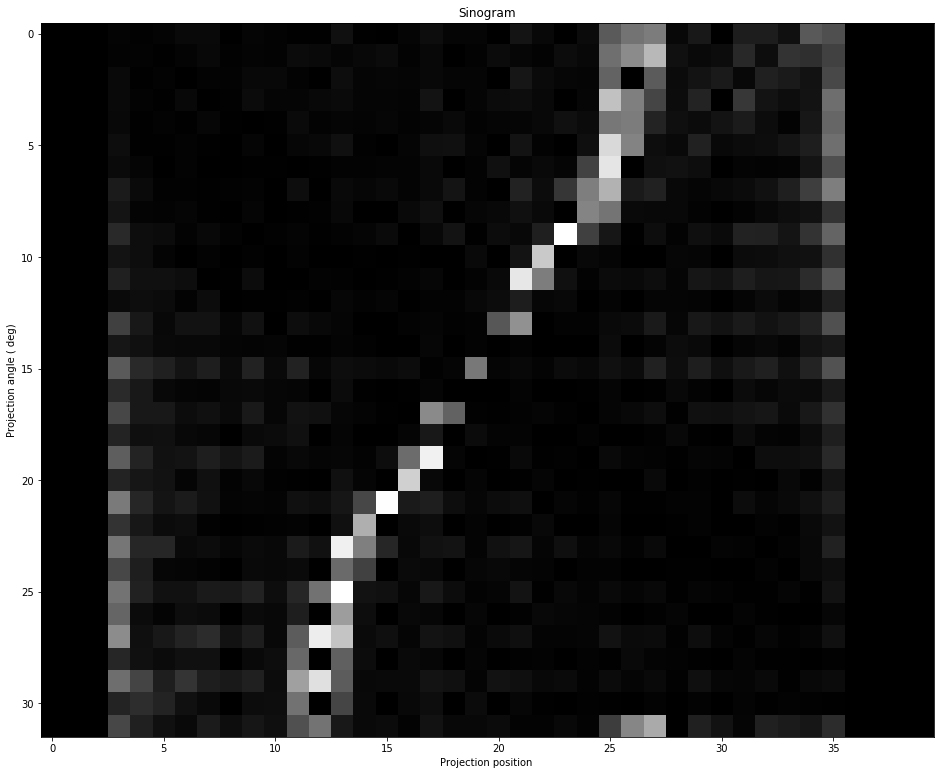

In [24]:
image1 = drawSinogram(40,32)
#fig, (ax1) = plt.subplots(1, 1)
fig, (ax1) = plt.subplots(1, 1, figsize = (16,16))
ax1.set_title("Sinogram")
ax1.set_xlabel("Projection position ")
ax1.set_ylabel("Projection angle ( deg)")
plt.imshow(image1, cmap=plt.cm.Greys_r,vmax=400)
